In [157]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [158]:
def extract_features(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
    return np.mean(mfccs.T, axis=0)

In [159]:
uploaded_file = """/03-01-08-02-01-02-24.wav
                   /03-01-05-01-01-01-24.wav
                   /03-01-08-02-01-02-24.wav
                   /03-01-08-02-02-01-24.wav
"""
file_paths = uploaded_file.strip().split('\n')
features = extract_features(file_paths[0].strip())
print("✅ Features extracted from uploaded .wav file.")

✅ Features extracted from uploaded .wav file.


In [160]:
features_list = []
for file_path in file_paths:
  features = extract_features(file_path.strip())
  features_list.append(features)
  print(f"✅ Features extracted from: {file_path.strip()}") # Optional: Print confirmation for each file

✅ Features extracted from: /03-01-08-02-01-02-24.wav
✅ Features extracted from: /03-01-05-01-01-01-24.wav
✅ Features extracted from: /03-01-08-02-01-02-24.wav
✅ Features extracted from: /03-01-08-02-02-01-24.wav


In [161]:
emotions = ['happy', 'sad', 'angry']
X = []
y = []

In [162]:
for label in emotions:
    for _ in range(10):
        noisy_features = features + np.random.normal(0, 0.5, 40)
        X.append(noisy_features)
        y.append(label)

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [164]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [165]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

In [166]:
print(f"\n✅ Accuracy: {acc * 100:.2f}%")
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))


✅ Accuracy: 50.00%

📋 Classification Report:
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         2
       happy       0.50      0.50      0.50         2
         sad       0.50      1.00      0.67         2

    accuracy                           0.50         6
   macro avg       0.33      0.50      0.39         6
weighted avg       0.33      0.50      0.39         6



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


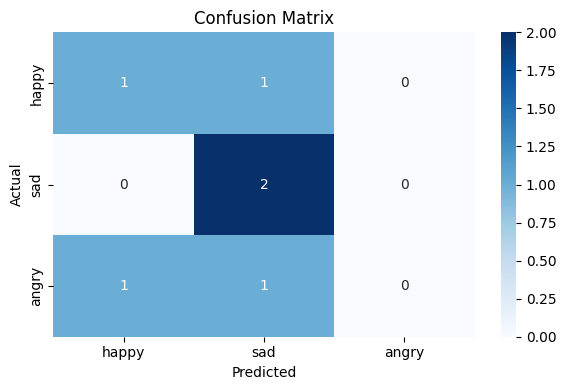

In [167]:
cm = confusion_matrix(y_test, y_pred, labels=emotions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=emotions, yticklabels=emotions, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()